## Perform SIA Vaderization and see how well it performs classification when used all by itself without any word vectorization (with plain vanilla Logistical Regression as the estimator)


In [1]:
# credit Brendan McDonnell for alot including but not limited to vaderSentiment demo

In [2]:
# do the imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('../../datasets/df_onion_not_onion.csv')

In [4]:
df.head()   

,title,source
0,'Buddhist aliens' have visited 'Thailand’s Are...,1
1,Disturbing: This Man Is Wearing Socks In The G...,1
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Gun Control Fail: This Duck Found A Gun In A B...,1
4,3M Releases Command Self-Adhesive Meat Hooks F...,1


### See how vaderization (sentiment analyzer) can do all by itself

##### First do vaderization the the whole 10,000 post dataset itself, and create a new dataframe that consists of original whole dataset with the newly acquired Sentiment results bolted on

In [5]:
sai = SentimentIntensityAnalyzer()

In [6]:
dicts = []
for index, row in df.iterrows():
    scores = sai.polarity_scores(row.title)
    scores['title'] = row.title
    scores['is_onion'] = row.source
    dicts.append(scores)

df_vaderized = pd.DataFrame(dicts)
df_vaderized

,neg,neu,pos,compound,title,is_onion
0,0.201,0.799,0.000,-0.7430,'Buddhist aliens' have visited 'Thailand’s Are...,1
1,0.292,0.708,0.000,-0.5106,Disturbing: This Man Is Wearing Socks In The G...,1
2,0.000,0.894,0.106,0.3818,Bold Move: Hulu Has Announced That They’re Gon...,1
3,0.328,0.672,0.000,-0.8074,Gun Control Fail: This Duck Found A Gun In A B...,1
4,0.264,0.736,0.000,-0.6486,3M Releases Command Self-Adhesive Meat Hooks F...,1
...,...,...,...,...,...,...
9995,0.000,1.000,0.000,0.0000,Protester tosses feminine hygiene device with ...,0
9996,0.000,0.917,0.083,0.2500,Dream Girl Movie Box Office Collection Day 1: ...,0
9997,0.146,0.678,0.176,0.1332,"‘Good roads lead to more accidents, not bad on...",0
9998,0.000,1.000,0.000,0.0000,Terengganu State Gov’t Withdrew From Women’s G...,0


<Figure size 432x288 with 0 Axes>

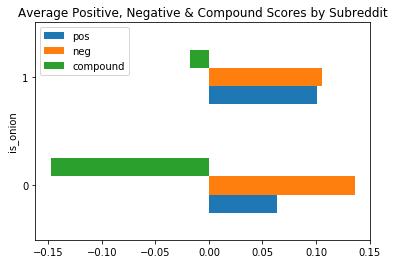

In [7]:
plt.figure()
df_vaderized.groupby('is_onion').mean()[['pos', 'neg', 'compound']].plot(kind='barh')
plt.title('Average Positive, Negative & Compound Scores by Subreddit')
plt.savefig('../code_for_utilities/sia_pos_neg_compound.png')

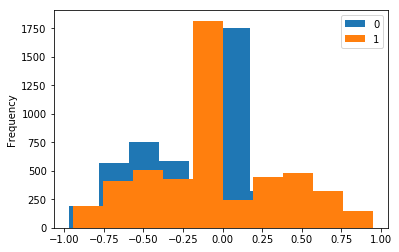

In [8]:
plt.figure()
df_vaderized.groupby('is_onion')['compound'].plot(kind= 'hist')
plt.legend()
plt.savefig('../code_for_utilities/sia_compound.png')
plt.show()

In [9]:
df_vaderized_is_onion = df_vaderized[df_vaderized['is_onion'] == 1]
df_vaderized_not_onion = df_vaderized[df_vaderized['is_onion'] == 0]

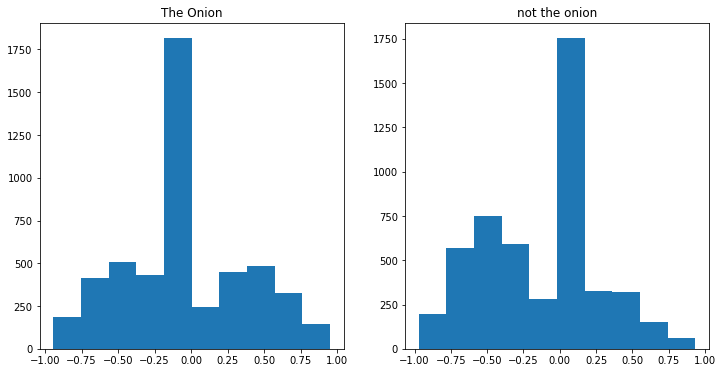

In [10]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.hist(df_vaderized_is_onion['compound'])
plt.title('The Onion')
plt.subplot(1,2,2)
plt.hist(df_vaderized_not_onion['compound'])
plt.title('not the onion')
plt.show()

### Pick garden variety Logistic Regression as the model to see how well Vaderization classifies by itself


In [11]:
X = df_vaderized.drop(['is_onion', 'title'], axis= 1)
y = df_vaderized['is_onion']
y.shape
y.unique()

array([1, 0])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state= 42)

In [13]:
logreg = LogisticRegression(C= 1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
logreg.score(X_train, y_train)

0.5656

In [15]:
logreg.score(X_test, y_test)

0.5688

In [16]:
X_train.head()
y_train.head()

1415    1
393     1
4991    1
8515    0
2422    1
Name: is_onion, dtype: int64

In [17]:
y_train.value_counts(normalize= True)

1    0.5
0    0.5
Name: is_onion, dtype: float64

### Vaderization with generic LogRegr by itself gets 0.0688 pick-up over baseline 0.5000

In [18]:
# save SAI Vaderized dataframe to feed later iterations
df_vaderized.to_csv('../../datasets/df_vaderized.csv')